# I. Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/273 Project'):
  for filename in filenames:
    print(os.path.join(dirname, filename))


/content/drive/My Drive/273 Project/train.csv
/content/drive/My Drive/273 Project/test.csv
/content/drive/My Drive/273 Project/sample_submission.csv
/content/drive/My Drive/273 Project/Heart Attack Risk Analysis.ipynb


In [4]:
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/273 Project/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/273 Project/test.csv')

In [5]:
import matplotlib.pyplot as plt

In [6]:
train_df.shape

(7010, 26)

In [7]:
train_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


# II. Data Cleaning and Exploration

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [130]:
train_df[['systolic_BP','diastolic_BP']] = train_df['Blood Pressure'].str.split('/',expand=True)

In [131]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Diet'] = train_df['Diet'].astype('category')
train_df['Diabetes'] = train_df['Diabetes'].astype('category')
train_df['Family History'] = train_df['Family History'].astype('category')
train_df['Smoking'] = train_df['Smoking'].astype('category')
train_df['Obesity'] = train_df['Obesity'].astype('category')
train_df['Alcohol Consumption'] = train_df['Alcohol Consumption'].astype('category')
train_df['Previous Heart Problems'] = train_df['Previous Heart Problems'].astype('category')
train_df['Medication Use'] = train_df['Medication Use'].astype('category')
train_df['Stress Level'] = train_df['Stress Level'].astype('category')
train_df['Continent'] = train_df['Continent'].astype('category')
train_df['Hemisphere'] = train_df['Hemisphere'].astype('category')
train_df['Heart Attack Risk'] = train_df['Heart Attack Risk'].astype('category')
train_df['systolic_BP'] = train_df['systolic_BP'].astype('int')
train_df['diastolic_BP'] = train_df['diastolic_BP'].astype('int')

In [132]:
train_df.describe()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,systolic_BP,diastolic_BP
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,9.979109,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,135.015549,85.150214
std,21.290957,80.709248,20.507160,5.769721,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,26.230182,14.739391
min,18.000000,120.000000,40.000000,0.002442,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,5.046024,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,112.000000,72.000000
50%,53.000000,259.000000,75.000000,9.982968,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,135.000000,85.000000
75%,72.000000,329.000000,93.000000,15.029659,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,19.998709,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,180.000000,110.000000


The summary statistics revealed that only 38% of sample having Heart attack risk with the mean age of the patients is around 54 years old, with a standard deviation of 21.3 years. The distribution of cholesterol levels across patients ranged from 120 mg/dL to 400 mg/dL, with a mean value of 260 mg/dL. People have average of 3.5 Physical activity days per week. However, people with higher heart attack risk have a longer range in days. Additionally, the majority of patients (78%) reported smoking with 50% having heart attack risk, 57% patient drink alcohol. 71% male having HA risk. 60% diabietes. BMI from 18 to 40, mean 29. Systolic BP is from 90 - 180, mean 135, diastolic is from 60 to 110, mean 85. Other than that, other features are similar across their levels.

In [10]:
train_df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [11]:
train_df.duplicated().sum()

0

### Data Visualization


1.   



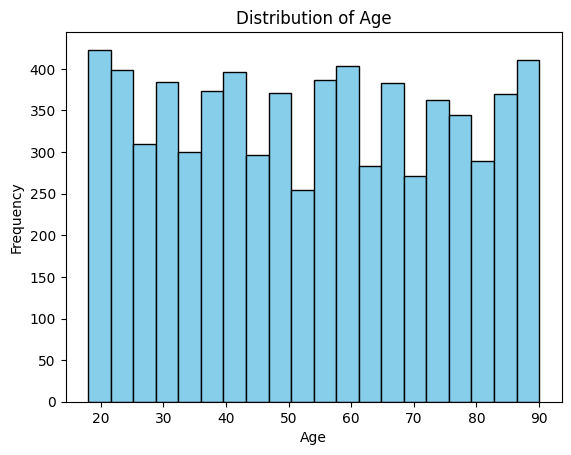

In [13]:
plt.hist(train_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [14]:
import seaborn as sns

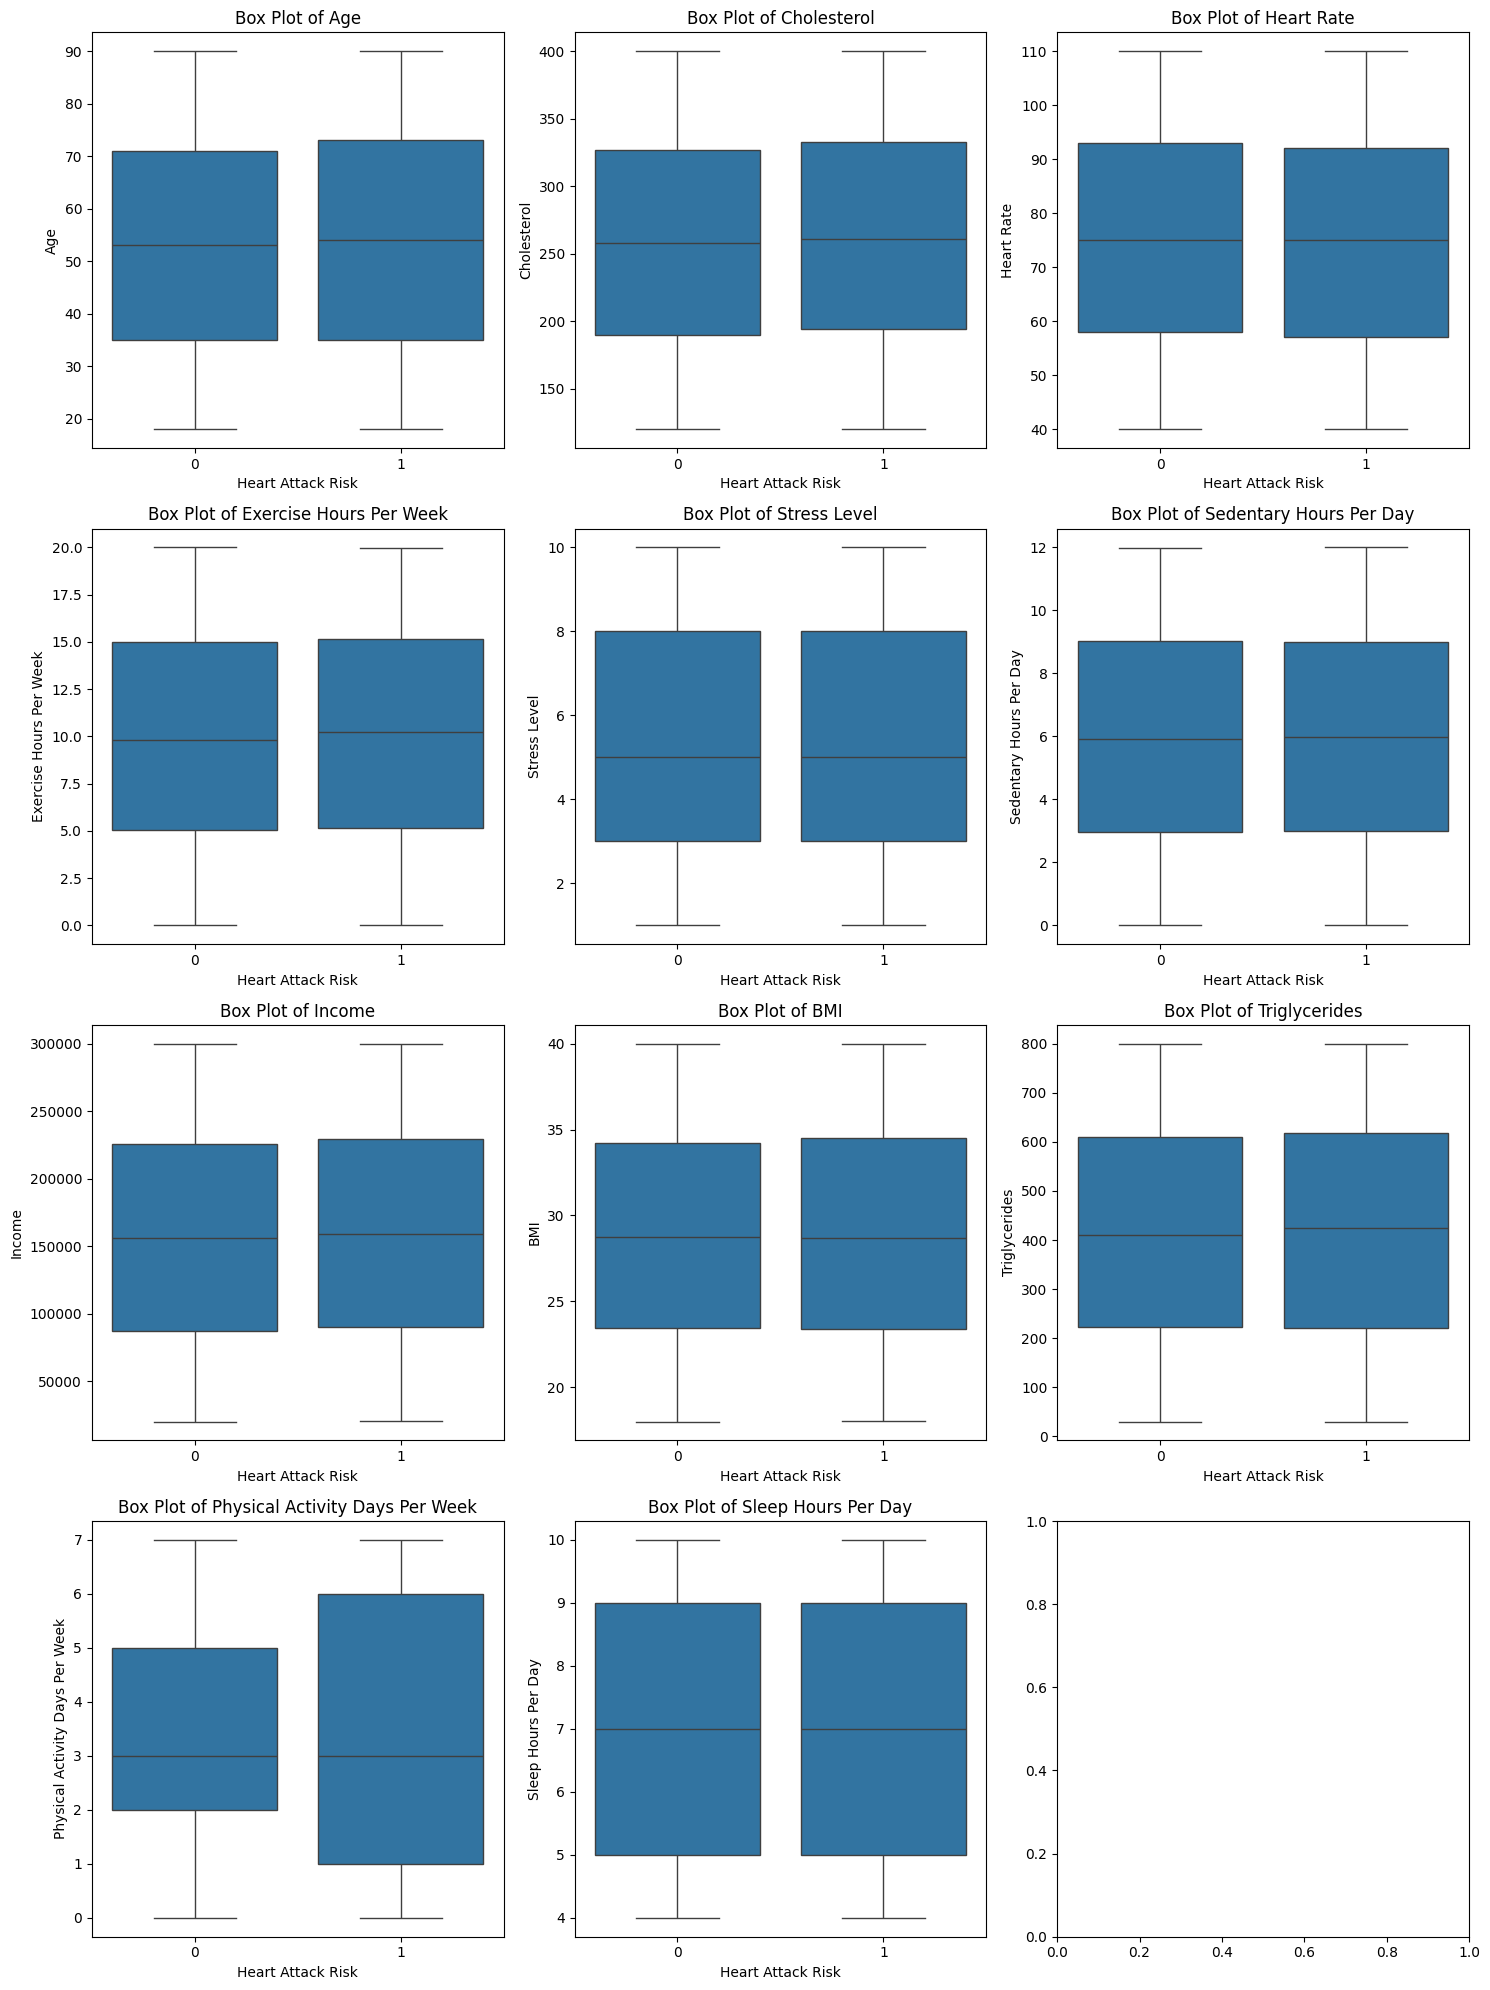

In [16]:
# Define the features for box plots
features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week','Stress Level', 'Sedentary Hours Per Day',
            'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']

# Create a grid of box plots
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i//3, i%3], data=train_df, x='Heart Attack Risk', y=feature)
    axes[i//3, i%3].set_title(f'Box Plot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

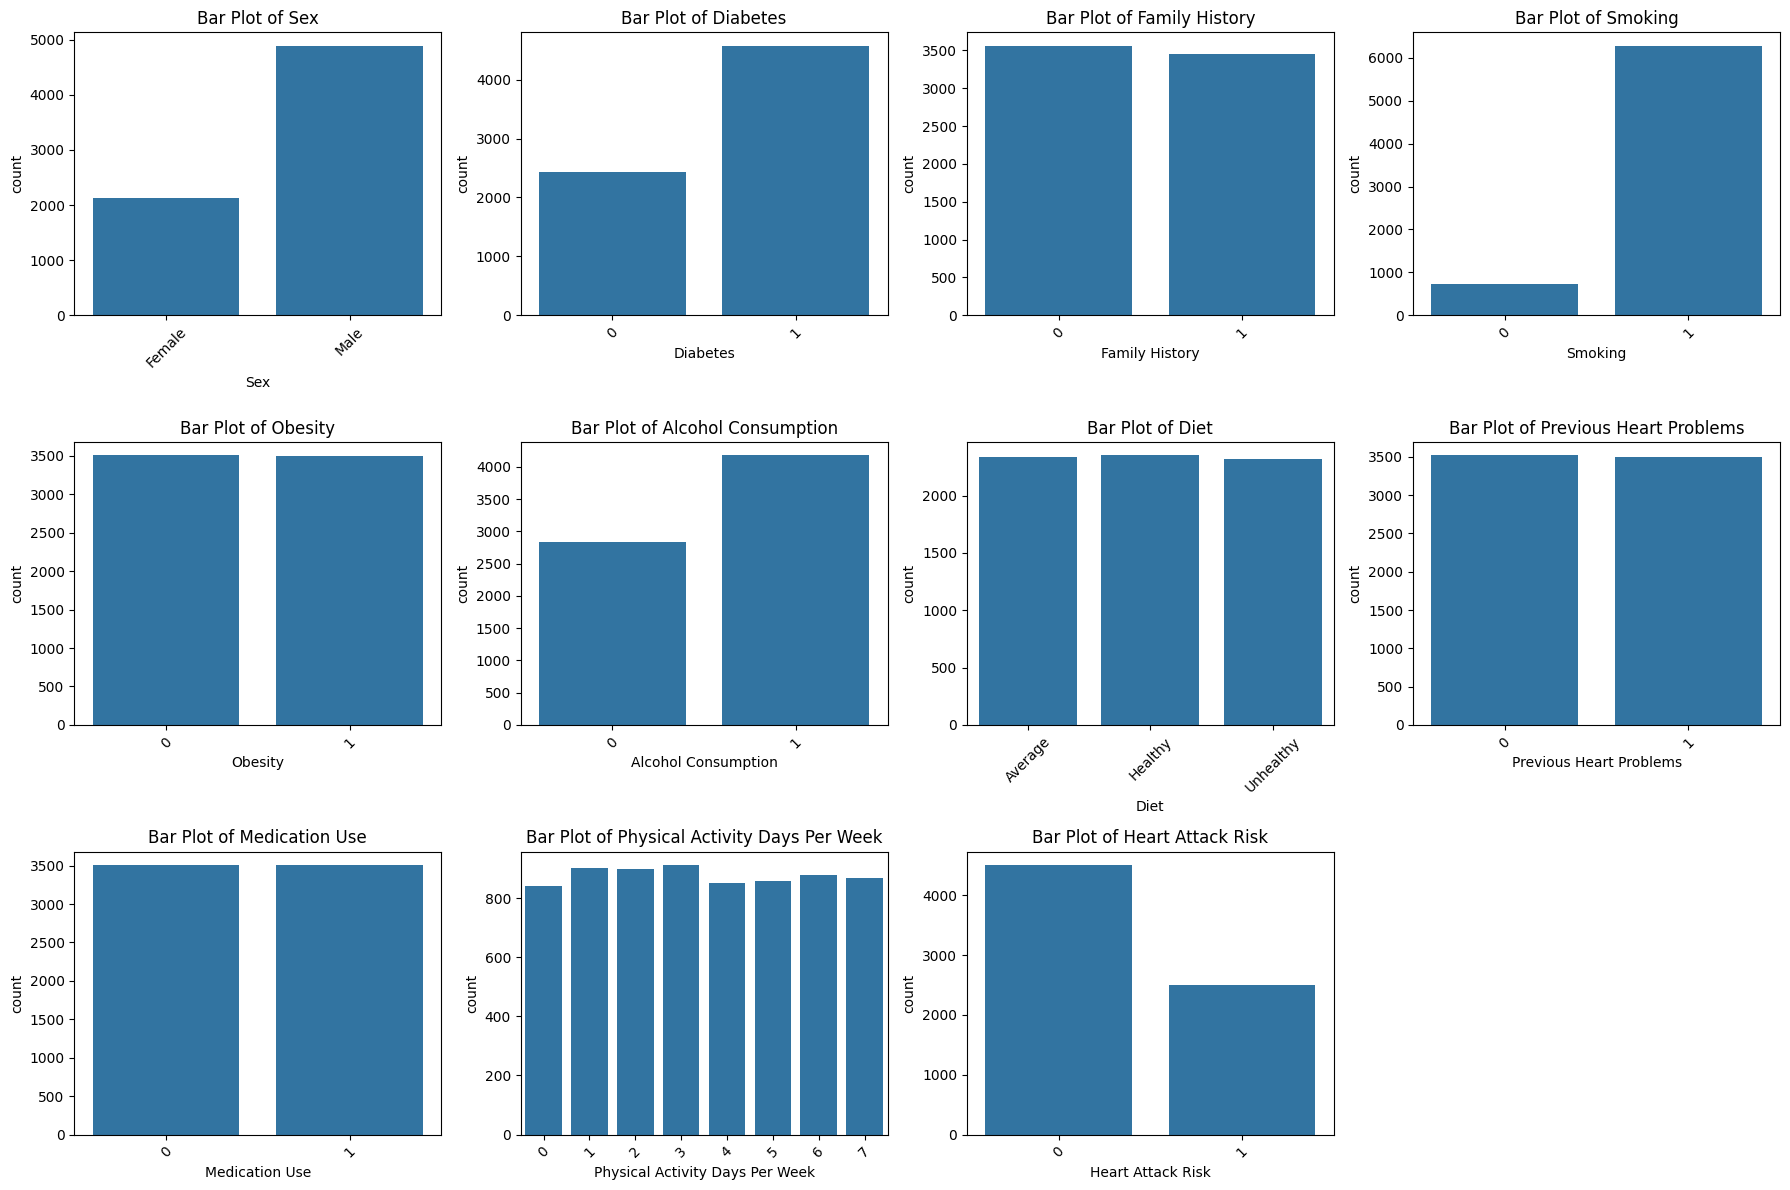

In [137]:
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
                        'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
                        'Medication Use', 'Physical Activity Days Per Week', 'Heart Attack Risk']
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=train_df, x=feature)  # Create the bar plot
    plt.title(f'Bar Plot of {feature}')  # Add title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Adjust layout
plt.tight_layout()
plt.show()

There are no outliers detected in the data. Distribution of each categories of heart attack is similar.

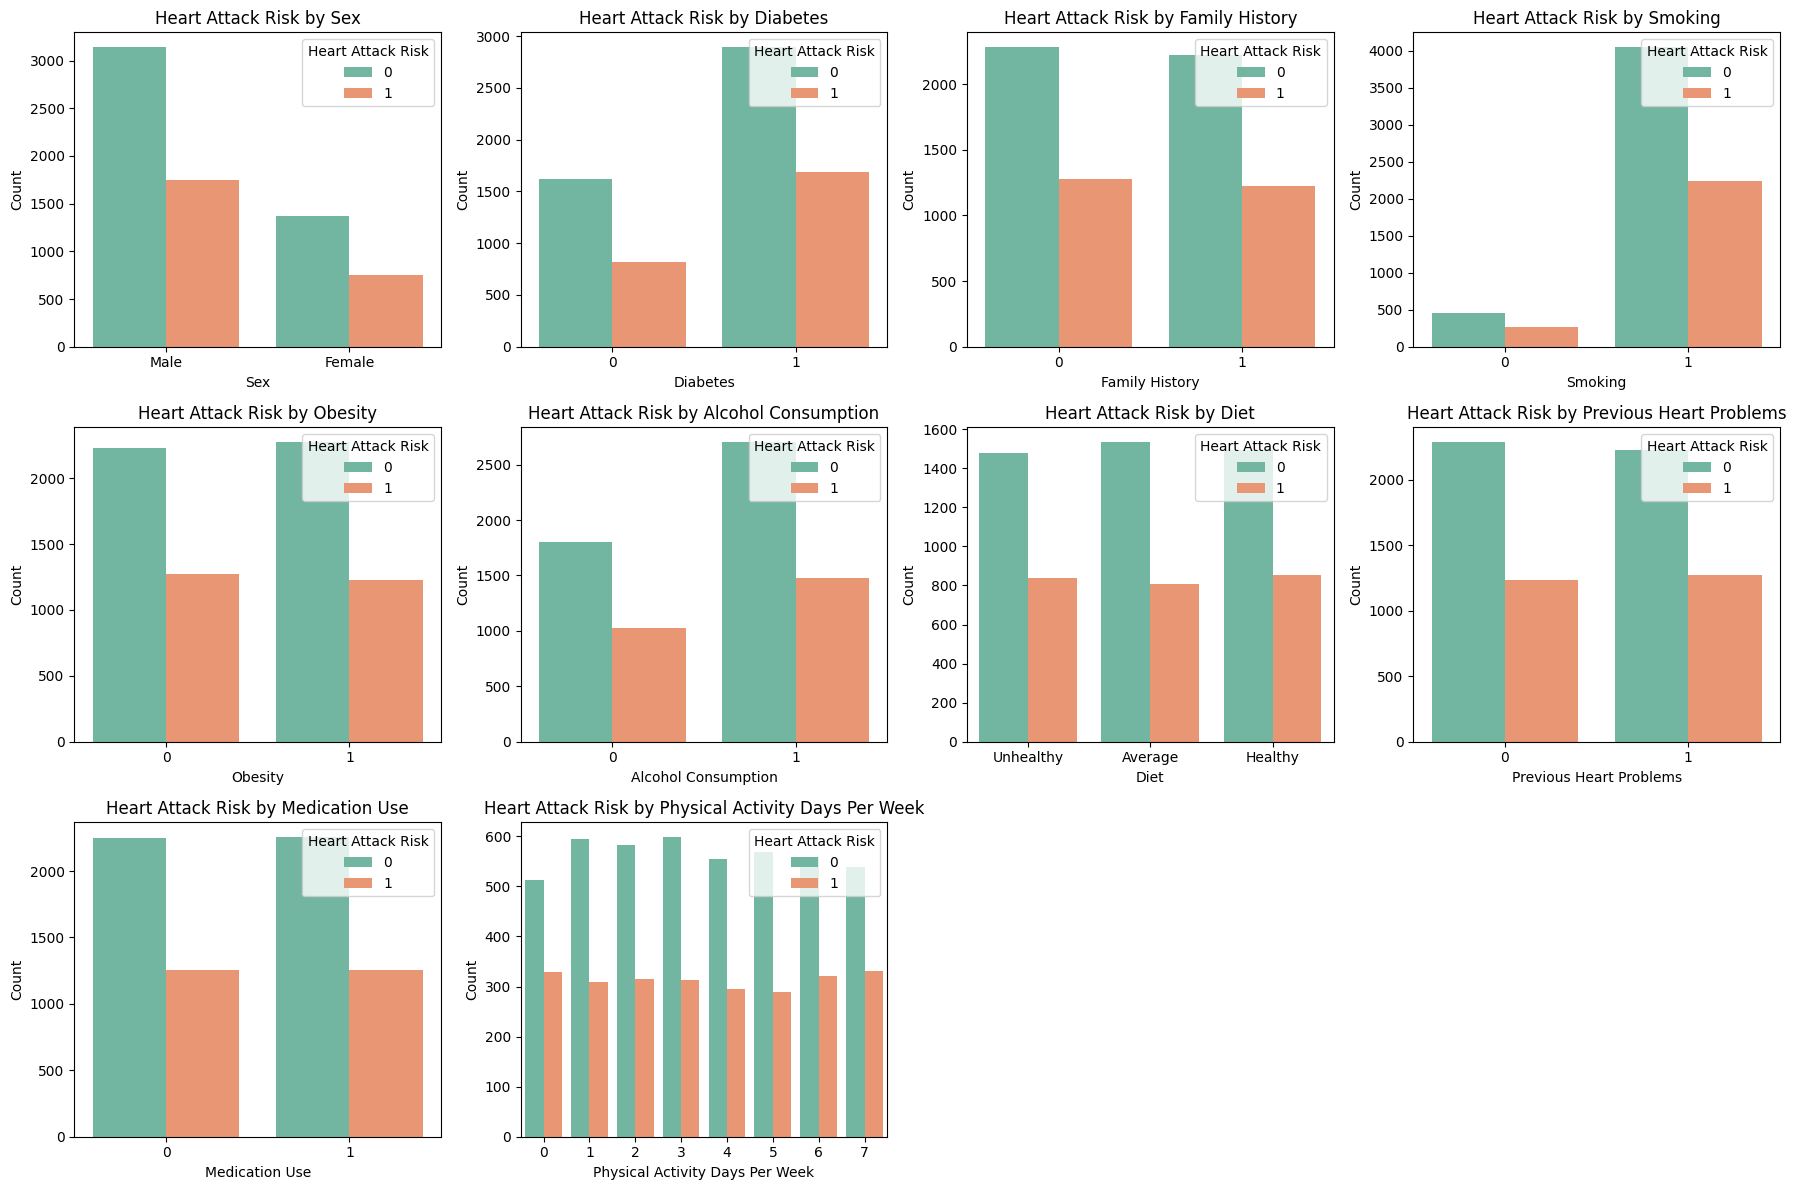

In [17]:
# Define categorical features
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
                        'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
                        'Medication Use', 'Physical Activity Days Per Week']

# Create count plots for each categorical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=train_df, x=feature, hue='Heart Attack Risk', palette='Set2')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Heart Attack Risk by {feature}')
    plt.legend(title='Heart Attack Risk', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-144-4736dac619eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


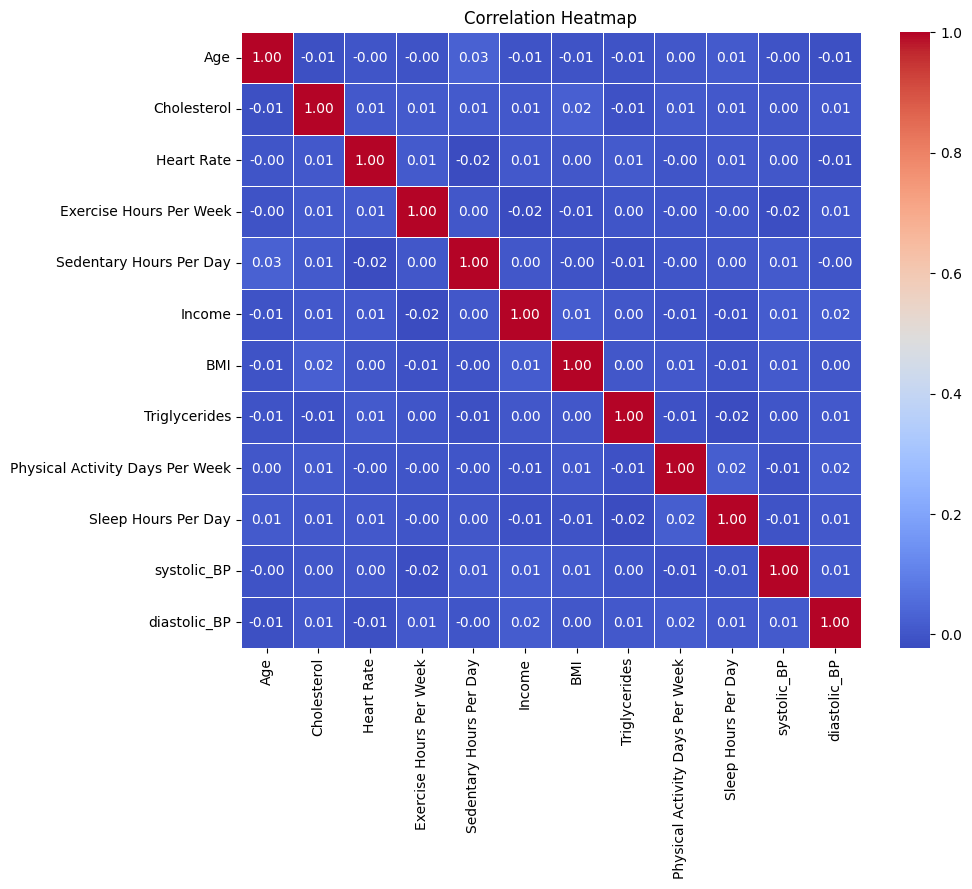

In [144]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

There are more males in the study than female. However, female are more likely to get heart attack than male. Other feature's does not tell anything obvious about the chance of getting heart attack between their different levels.

# III. Models

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [19]:
# Identify categorical columns with non-numeric values
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Convert categorical variables to dummy variables (one-hot encoding)
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns)

# Extract X, y after encoding
X = train_df_encoded.drop(['Heart Attack Risk'], axis=1)
y = train_df['Heart Attack Risk']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

Explained variance ratio: [0.00050653 0.00037449 0.00037125 0.00035859 0.00035237 0.00034854]
Total variance explained: 0.0023117623937211574


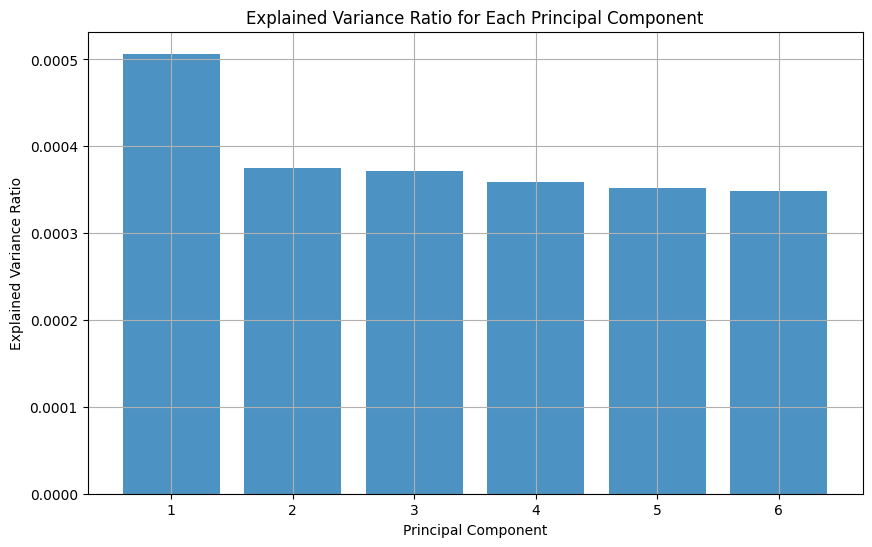

In [20]:
# Specify the number of components
n_components = 6

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Total explained variance
total_variance_explained = sum(explained_variance_ratio)
print("Total variance explained:", total_variance_explained)

# Plotting the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.grid(True)
plt.show()


In [102]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [36]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6098430813124108


In [68]:
# Logistic Regression Model with feature selection
lr = LogisticRegression(penalty = 'l1',solver='liblinear')
lr.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6562054208273894


In [61]:
# SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Prediction and evaluation
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6654778887303852


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6654778887303852


In [105]:
# Define the neural network architecture with L1 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Epoch 1/20
158/158 [==============================] - 8s 38ms/step - loss: 17.5969 - accuracy: 0.6348 - val_loss: 2.9638 - val_accuracy: 0.6185
Epoch 2/20
158/158 [==============================] - 5s 34ms/step - loss: 2.3879 - accuracy: 0.6392 - val_loss: 2.2655 - val_accuracy: 0.6185
Epoch 3/20
158/158 [==============================] - 4s 26ms/step - loss: 2.2578 - accuracy: 0.6392 - val_loss: 2.2764 - val_accuracy: 0.6185
Epoch 4/20
158/158 [==============================] - 4s 23ms/step - loss: 2.2621 - accuracy: 0.6392 - val_loss: 2.2777 - val_accuracy: 0.6185
Epoch 5/20
158/158 [==============================] - 4s 24ms/step - loss: 2.2652 - accuracy: 0.6392 - val_loss: 2.2768 - val_accuracy: 0.6185
Epoch 6/20
158/158 [==============================] - 5s 31ms/step - loss: 2.2673 - accuracy: 0.6392 - val_loss: 2.2823 - val_accuracy: 0.6185
Epoch 7/20
158/158 [==============================] - 4s 24ms/step - loss: 2.2687 - accuracy: 0.6392 - val_loss: 2.2783 - val_accuracy: 0.618

In [100]:
# Using PCA features
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2019)


In [73]:
lr.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6654778887303852


In [65]:
# SVM using pca
# Initialize
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6654778887303852


In [77]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6098430813124108


In [103]:
import numpy as np
import tensorflow as tf

# Assuming you have your feature matrix X and target vector y


# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Epoch 1/20
158/158 [==============================] - 3s 14ms/step - loss: 0.7086 - accuracy: 0.5962 - val_loss: 0.6872 - val_accuracy: 0.5882
Epoch 2/20
158/158 [==============================] - 2s 13ms/step - loss: 0.2500 - accuracy: 0.9190 - val_loss: 0.7854 - val_accuracy: 0.5437
Epoch 3/20
158/158 [==============================] - 3s 17ms/step - loss: 0.0312 - accuracy: 0.9935 - val_loss: 0.8921 - val_accuracy: 0.5258
Epoch 4/20
158/158 [==============================] - 2s 13ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9453 - val_accuracy: 0.5205
Epoch 5/20
158/158 [==============================] - 2s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9818 - val_accuracy: 0.5116
Epoch 6/20
158/158 [==============================] - 3s 16ms/step - loss: 7.4438e-04 - accuracy: 1.0000 - val_loss: 1.0099 - val_accuracy: 0.5116
Epoch 7/20
158/158 [==============================] - 3s 21ms/step - loss: 4.9432e-04 - accuracy: 1.0000 - val_loss: 1.0328 - val_accuracy

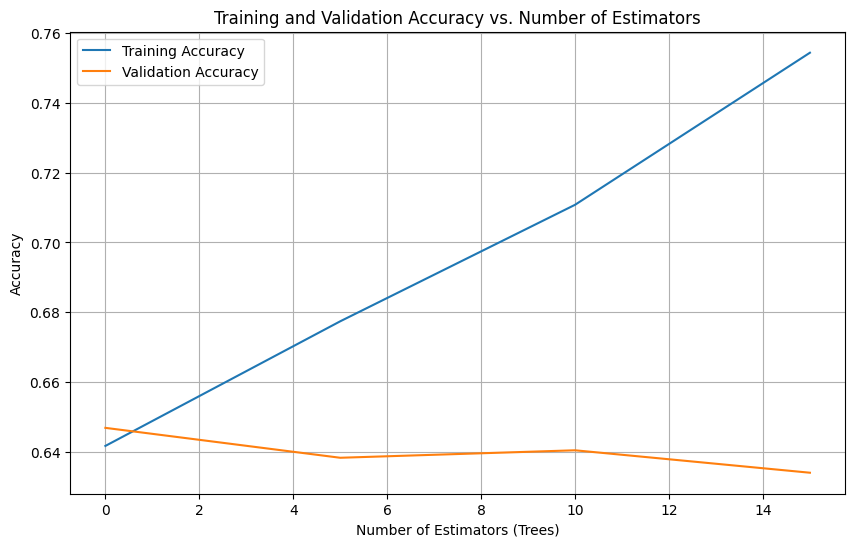

In [95]:
# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Define a range of values for the number of estimators
estimator_range = range(0, 20, 5)

# Train XGBoost models with different numbers of estimators
for n_estimators in estimator_range:
    # Initialize XGBoost classifier
    clf = xgb.XGBClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Predictions on training and validation sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot training and validation accuracies against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_accuracies, label='Training Accuracy')
plt.plot(estimator_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

### 1. Logistic Regression

### 2. Support Vector Machine (SVM)

### 3. Random Forest

### 4. XGBoost

### 5. Neural Network (Feedforward)